In [1]:
import xarray as xr
import numpy as np
import os
import matplotlib.pyplot as plt

In [ ]:
# Load dataset
file1 = xr.open_dataset('~/Parameters/Qsg_maxhs.nc')
file2 = xr.open_dataset('~/Parameters/Qsg_minhs.nc')

Qsg = file1.Qsg.data
alp11_1 = file1.alpha11.data
alp11_1[alp11_1<0] = 0
alp22_1 = file1.alpha22.data
Qe1 = file1.Qe.data
Qsm1 = file1.Qsm.data
Tsr1 = file1.Ts.data / file1.Ts_in.data
Tsre1 = file1.Ts_e.data / file1.Ts_in.data

alp11_2 = file2.alpha11.data
alp11_2[alp11_2<0] = 0
alp22_2 = file2.alpha22.data
Qe2 = file2.Qe.data
Qsm2 = file2.Qsm.data
Tsr2 = file2.Ts.data / file2.Ts_in.data
Tsre2 = file2.Ts_e.data / file2.Ts_in.data

In [ ]:
# Print output
Tsr1, Tsre1, Qsg

In [ ]:
fig1 = plt.figure(figsize=(10,10))
#fig1.tight_layout()
#plt.grid(linestyle='--', linewidth=0.5)    
ax1 = fig1.add_subplot(221)
ax2 = fig1.add_subplot(222)
ax3 = fig1.add_subplot(223)
ax4 = fig1.add_subplot(224)

# Reflux coeff plot
ax1.plot(Qsg,alp11_1,'^-r', Qsg,alp22_1,'o-r', ms=6,lw=2)
ax1.plot(Qsg,alp11_2,'^-b', Qsg,alp22_2,'o-b', ms=6,lw=2)

line1 = plt.Line2D((0,1),(0,0), color='r', lw=2, linestyle='-')
line2 = plt.Line2D((0,1),(0,0), color='b', lw=2, linestyle='-')
marker1 = plt.Line2D((0,1),(0,0), color='k', marker='o', linestyle='')
marker2 = plt.Line2D((0,1),(0,0), color='k', marker='^', linestyle='') 
ax1.legend([line1,line2,marker1,marker2],[r'$h_s/h=0.12$',r'$h_s/h=0.04$',r'$\alpha_{11}$', r'$\alpha_{22}$'],
              loc='best', fontsize=10)

ax1.grid(linestyle='--', linewidth=0.5)
ax1.set_ylabel(r'Reflux Coefficient',size = 12)
#ax1.xaxis.set_visible(False)
ax1.set_title(r'(a)', loc='left', size=12, weight='bold')


# Qe plot
ax2.plot(Qsg,Qe1/1000,'o-r', Qsg,Qe2/1000,'o-b',ms=6, lw=2)
ax2.legend([r'$h_s/h=0.12$',r'$h_s/h=0.04$'],loc='right', fontsize=10)
ax2.set_ylabel(r'$Q_e\;[\times 10^3m^3/s]$',size = 12)
ax2.grid(linestyle='--', linewidth=0.5)
ax2.set_title(r'(b)', loc='left', size=12, weight='bold')


# T_fjord/T_shelf plot
ax3.plot(Qsg,Tsre1,'o-r', Qsg,Tsre2,'o-b',ms=6, lw=2)
ax3.legend([r'$h_s/h=0.12$',r'$h_s/h=0.04$'],loc='right', fontsize=10)
ax3.set_xlabel(r'$Q_{sg}\;[m^3/s]$',size = 12)
ax3.set_ylabel(r'$T_{fjord}/T_{shelf}$',size = 12)
ax3.grid(linestyle='--', linewidth=0.5)
ax3.set_title(r'(c)', loc='left', size=12, weight='bold')


# Qsm plot
ax4.plot(Qsg,Qsm1,'o-r', Qsg,Qsm2,'o-b',ms=6, lw=2)
ax4.legend([r'$h_s/h=0.12$',r'$h_s/h=0.04$'],loc='right', fontsize=10)
ax4.set_xlabel(r'$Q_{sg}\;[m^3/s]$',size = 12)
ax4.set_ylabel(r'$Q_{sm}\;[m^3/s]$',size = 12)
ax4.grid(linestyle='--', linewidth=0.5)
ax4.set_title(r'(d)', loc='left', size=12, weight='bold')

In [2]:
# Load dataset
file1 = xr.open_dataset('~/Parameters/T0_maxQsg.nc')
file2 = xr.open_dataset('~/Parameters/T0_minQsg.nc')

T0 = file1.T0.data
alp11_1 = file1.alpha11.data
alp11_1[alp11_1<0] = 0
alp22_1 = file1.alpha22.data
Qe1 = file1.Qe.data
Qsm1 = file1.Qsm.data
Tsr1 = file1.Ts.data / file1.Ts_in.data
Tsre1 = file1.Ts_e.data / file1.Ts_in.data

alp11_2 = file2.alpha11.data
alp11_2[alp11_2<0] = 0
alp22_2 = file2.alpha22.data
Qe2 = file2.Qe.data
Qsm2 = file2.Qsm.data
Tsr2 = file2.Ts.data / file2.Ts_in.data
Tsre2 = file2.Ts_e.data / file2.Ts_in.data

In [ ]:
T0

Text(0.0, 1.0, '(b)')

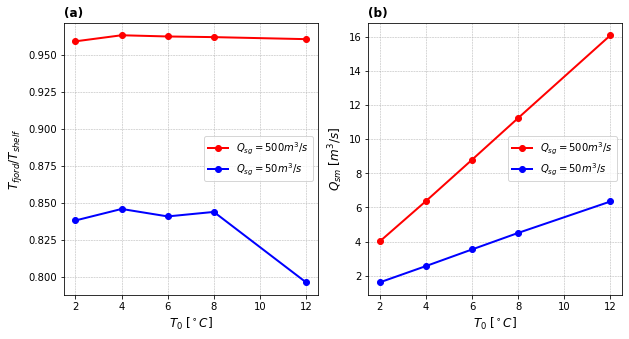

In [3]:
fig2 = plt.figure(figsize=(10,5))
#fig1.tight_layout()
#plt.grid(linestyle='--', linewidth=0.5)    
ax1 = fig2.add_subplot(121)
ax2 = fig2.add_subplot(122)
# ax3 = fig1.add_subplot(223)
# ax4 = fig1.add_subplot(224)

# Reflux coeff plot
# ax1.plot(T0,alp11_1,'^-r', T0,alp22_1,'o-r', ms=6,lw=2)
# ax1.plot(T0,alp11_2,'^-b', T0,alp22_2,'o-b', ms=6,lw=2)

# line1 = plt.Line2D((0,1),(0,0), color='r', lw=2, linestyle='-')
# line2 = plt.Line2D((0,1),(0,0), color='b', lw=2, linestyle='-')
# marker1 = plt.Line2D((0,1),(0,0), color='k', marker='o', linestyle='')
# marker2 = plt.Line2D((0,1),(0,0), color='k', marker='^', linestyle='') 
# ax1.legend([line1,line2,marker1,marker2],[r'$Q_{sg}=500 m^3/s$',r'$Q_{sg}=50 m^3/s$',r'$\alpha_{22}$', r'$\alpha_{11}$'],
#               loc='best', fontsize=10)

# ax1.grid(linestyle='--', linewidth=0.5)
# ax1.set_ylabel(r'Reflux Coefficient',size = 12)
# #ax1.xaxis.set_visible(False)
# ax1.set_title(r'(a)', loc='left', size=12, weight='bold')


# Qe plot
# ax2.plot(T0,Qe1/1000,'o-r', T0,Qe2/1000,'o-b',ms=6, lw=2)
# ax2.legend([r'$Q_{sg}=500 m^3/s$',r'$Q_{sg}=50 m^3/s$'],loc='right', fontsize=10)
# ax2.set_ylabel(r'$Q_e\;[\times 10^3m^3/s]$',size = 12)
# ax2.grid(linestyle='--', linewidth=0.5)
# ax2.set_title(r'(b)', loc='left', size=12, weight='bold')


# T_fjord/T_shelf plot
ax1.plot(T0,Tsre1,'o-r', T0,Tsre2,'o-b',ms=6, lw=2)
ax1.legend([r'$Q_{sg}=500 m^3/s$',r'$Q_{sg}=50 m^3/s$'],loc='right', fontsize=10)
ax1.set_xlabel(r'$T_0\;[^\circ C]$',size = 12)
ax1.set_ylabel(r'$T_{fjord}/T_{shelf}$',size = 12)
ax1.grid(linestyle='--', linewidth=0.5)
ax1.set_title(r'(a)', loc='left', size=12, weight='bold')


# Qsm plot
ax2.plot(T0,Qsm1,'o-r', T0,Qsm2,'o-b',ms=6, lw=2)
ax2.legend([r'$Q_{sg}=500 m^3/s$',r'$Q_{sg}=50 m^3/s$'],loc='right', fontsize=10)
ax2.set_xlabel(r'$T_0\;[^\circ C]$',size = 12)
ax2.set_ylabel(r'$Q_{sm}\;[m^3/s]$',size = 12)
ax2.grid(linestyle='--', linewidth=0.5)
ax2.set_title(r'(b)', loc='left', size=12, weight='bold')

In [4]:
# Load dataset
file1 = xr.open_dataset('~/Parameters/Sz_maxhs.nc')
file2 = xr.open_dataset('~/Parameters/Sz_minhs.nc')

Sz = file1.Sz.data
alp11_1 = file1.alpha11.data
alp11_1[alp11_1<0] = 0
alp22_1 = file1.alpha22.data
Qe1 = file1.Qe.data
Qsm1 = file1.Qsm.data
Tsr1 = file1.Ts.data / file1.Ts_in.data
Tsre1 = file1.Ts_e.data / file1.Ts_in.data

alp11_2 = file2.alpha11.data
alp11_2[alp11_2<0] = 0
alp22_2 = file2.alpha22.data
Qe2 = file2.Qe.data
Qsm2 = file2.Qsm.data
Tsr2 = file2.Ts.data / file2.Ts_in.data
Tsre2 = file2.Ts_e.data / file2.Ts_in.data

In [ ]:
alp11_1, alp22_1, alp11_2, alp22_2

Text(0.0, 1.0, '(d)')

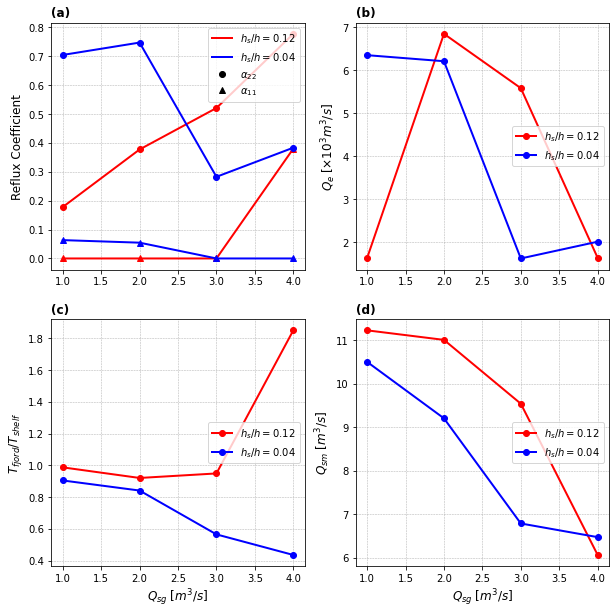

In [5]:
fig3 = plt.figure(figsize=(10,10))
#fig1.tight_layout()
#plt.grid(linestyle='--', linewidth=0.5)    
ax1 = fig3.add_subplot(221)
ax2 = fig3.add_subplot(222)
ax3 = fig3.add_subplot(223)
ax4 = fig3.add_subplot(224)

# Reflux coeff plot
ax1.plot(Sz,alp11_1,'^-r', Sz,alp22_1,'o-r', ms=6,lw=2)
ax1.plot(Sz,alp11_2,'^-b', Sz,alp22_2,'o-b', ms=6,lw=2)

line1 = plt.Line2D((0,1),(0,0), color='r', lw=2, linestyle='-')
line2 = plt.Line2D((0,1),(0,0), color='b', lw=2, linestyle='-')
marker1 = plt.Line2D((0,1),(0,0), color='k', marker='o', linestyle='')
marker2 = plt.Line2D((0,1),(0,0), color='k', marker='^', linestyle='') 
ax1.legend([line1,line2,marker1,marker2],[r'$h_s/h=0.12$',r'$h_s/h=0.04$',r'$\alpha_{22}$', r'$\alpha_{11}$'],
              loc='best', fontsize=10)

ax1.grid(linestyle='--', linewidth=0.5)
ax1.set_ylabel(r'Reflux Coefficient',size = 12)
#ax1.xaxis.set_visible(False)
ax1.set_title(r'(a)', loc='left', size=12, weight='bold')


# Qe plot
ax2.plot(Sz,Qe1/1000,'o-r', Sz,Qe2/1000,'o-b',ms=6, lw=2)
ax2.legend([r'$h_s/h=0.12$',r'$h_s/h=0.04$'],loc='right', fontsize=10)
ax2.set_ylabel(r'$Q_e\;[\times 10^3m^3/s]$',size = 12)
ax2.grid(linestyle='--', linewidth=0.5)
ax2.set_title(r'(b)', loc='left', size=12, weight='bold')


# T_fjord/T_shelf plot
#Tsre1[-1] = Tsr1[-1]
ax3.plot(Sz,Tsre1,'o-r', Sz,Tsre2,'o-b',ms=6, lw=2)
ax3.legend([r'$h_s/h=0.12$',r'$h_s/h=0.04$'],loc='right', fontsize=10)
ax3.set_xlabel(r'$Q_{sg}\;[m^3/s]$',size = 12)
ax3.set_ylabel(r'$T_{fjord}/T_{shelf}$',size = 12)
ax3.grid(linestyle='--', linewidth=0.5)
ax3.set_title(r'(c)', loc='left', size=12, weight='bold')


# Qsm plot
ax4.plot(Sz,Qsm1,'o-r', Sz,Qsm2,'o-b',ms=6, lw=2)
ax4.legend([r'$h_s/h=0.12$',r'$h_s/h=0.04$'],loc='right', fontsize=10)
ax4.set_xlabel(r'$Q_{sg}\;[m^3/s]$',size = 12)
ax4.set_ylabel(r'$Q_{sm}\;[m^3/s]$',size = 12)
ax4.grid(linestyle='--', linewidth=0.5)
ax4.set_title(r'(d)', loc='left', size=12, weight='bold')

In [ ]:
# Load dataset T0 & Sz
file1 = xr.open_dataset('~/Parameters/T0_maxQsg.nc')
file2 = xr.open_dataset('~/Parameters/T0_minQsg.nc')
file3 = xr.open_dataset('~/Parameters/Sz_maxhs.nc')
file4 = xr.open_dataset('~/Parameters/Sz_minhs.nc')

T0 = file1.T0.data
Qsm1 = file1.Qsm.data
Tsr1 = file1.Ts.data / file1.Ts_in.data
Tsre1 = file1.Ts_e.data / file1.Ts_in.data

Qsm2 = file2.Qsm.data
Tsr2 = file2.Ts.data / file2.Ts_in.data
Tsre2 = file2.Ts_e.data / file2.Ts_in.data

Sz = file3.Sz.data
Qsm3 = file3.Qsm.data
Tsr3 = file3.Ts.data / file3.Ts_in.data
Tsre3 = file3.Ts_e.data / file3.Ts_in.data

Qsm4 = file4.Qsm.data
Tsr4 = file4.Ts.data / file4.Ts_in.data
Tsre4 = file4.Ts_e.data / file4.Ts_in.data

In [ ]:
Tsr3, Tsre3, Tsr4, Tsre4

In [ ]:
Tsre3[-1] = Tsr3[-1]
Tsre4[-2:] = Tsre4[-2:] + 0.3
fig4 = plt.figure(figsize=(10,10))
#fig1.tight_layout()
#plt.grid(linestyle='--', linewidth=0.5)    
ax1 = fig4.add_subplot(221)
ax2 = fig4.add_subplot(222)
ax3 = fig4.add_subplot(223)
ax4 = fig4.add_subplot(224)

ax1.plot(T0[:-1],Tsre1[:-1],'o-r', T0[:-1],Tsre2[:-1],'o-b',ms=6, lw=2)
ax1.legend([r'$Q_{sg}=500 m^3/s$',r'$Q_{sg}=50 m^3/s$'],loc='right', fontsize=10)
ax1.set_xlabel(r'$T_0\;[^\circ C]$',size = 12)
ax1.set_ylabel(r'$T_{fjord}/T_{shelf}$',size = 12)
ax1.grid(linestyle='--', linewidth=0.5)
ax1.set_title(r'(a)', loc='left', size=12, weight='bold')


# Qe plot
ax2.plot(T0[:-1],Qsm1[:-1],'o-r', T0[:-1],Qsm2[:-1],'o-b',ms=6, lw=2)
ax2.legend([r'$Q_{sg}=500 m^3/s$',r'$Q_{sg}=50 m^3/s$'],loc='right', fontsize=10)
ax2.set_xlabel(r'$T_0\;[^\circ C]$',size = 12)
ax2.set_ylabel(r'$Q_{sm}\;[m^3/s]$',size = 12)
ax2.grid(linestyle='--', linewidth=0.5)
ax2.set_title(r'(b)', loc='left', size=12, weight='bold')


# T_fjord/T_shelf plot
#Tsre1[-1] = Tsr1[-1]
ax3.plot(Sz,Tsre3,'o-r', Sz,Tsre4,'o-b',ms=6, lw=2)
ax3.legend([r'$h_s/h=0.12$',r'$h_s/h=0.04$'],loc='right', fontsize=10)
ax3.set_xlabel(r'$[psu\cdot m^{-1}]$',size = 12)
ax3.set_ylabel(r'$T_{fjord}/T_{shelf}$',size = 12)
ax3.grid(linestyle='--', linewidth=0.5)
ax3.set_title(r'(c)', loc='left', size=12, weight='bold')
ax3.set_xticks([1, 2, 3, 4])
ax3.set_xticklabels([r'$\frac{\partial S_0}{\partial z}$',r'$2\frac{\partial S_0}{\partial z}$',
                    r'$3\frac{\partial S_0}{\partial z}$',r'$4\frac{\partial S_0}{\partial z}$'], size=12)

# Qsm plot
ax4.plot(Sz,Qsm3,'o-r', Sz,Qsm4,'o-b',ms=6, lw=2)
ax4.legend([r'$h_s/h=0.12$',r'$h_s/h=0.04$'],loc='right', fontsize=10)
ax4.set_xlabel(r'$[psu\cdot m^{-1}]$',size = 12)
ax4.set_ylabel(r'$Q_{sm}\;[m^3/s]$',size = 12)
ax4.grid(linestyle='--', linewidth=0.5)
ax4.set_title(r'(d)', loc='left', size=12, weight='bold')
ax4.set_xticks([1, 2, 3, 4])
ax4.set_xticklabels([r'$\frac{\partial S_0}{\partial z}$',r'$2\frac{\partial S_0}{\partial z}$',
                    r'$3\frac{\partial S_0}{\partial z}$',r'$4\frac{\partial S_0}{\partial z}$'], size=12)

In [ ]:
# Load dataset Bottom Drag (Cd) case
file1 = xr.open_dataset('~/Parameters/Cd_01.nc')
file2 = xr.open_dataset('~/Parameters/Cd_025.nc')
file3 = xr.open_dataset('~/Parameters/Cd_10.nc')
file4 = xr.open_dataset('~/Parameters/Cd_25.nc')

#Cd = file1.Cd.data
alp11_1 = file1.alpha11.data
alp11_1[alp11_1<0] = 0
alp22_1 = file1.alpha22.data
Qe1 = file1.Qe.data
Qsm1 = file1.Qsm.data
Tsr1 = file1.Ts.data / file1.Ts_in.data
Tsre1 = file1.Ts_e.data / file1.Ts_in.data

alp11_2 = file2.alpha11.data
alp11_2[alp11_2<0] = 0
alp22_2 = file2.alpha22.data
Qe2 = file2.Qe.data
Qsm2 = file2.Qsm.data
Tsr2 = file2.Ts.data / file2.Ts_in.data
Tsre2 = file2.Ts_e.data / file2.Ts_in.data

alp11_3 = file3.alpha11.data
alp11_3[alp11_3<0] = 0
alp22_3 = file3.alpha22.data
Qe3 = file3.Qe.data
Qsm3 = file3.Qsm.data
Tsr3 = file3.Ts.data / file3.Ts_in.data
Tsre3 = file3.Ts_e.data / file3.Ts_in.data


alp11_4 = file4.alpha11.data
alp11_4[alp11_4<0] = 0
alp22_4 = file4.alpha22.data
Qe4 = file4.Qe.data
Qsm4 = file4.Qsm.data
Tsr4 = file4.Ts.data / file4.Ts_in.data
Tsre4 = file4.Ts_e.data / file4.Ts_in.data


alp11_minhs = np.array([alp11_1[0],alp11_2[0],alp11_3[0],alp11_4[0]])
alp11_maxhs = np.array([alp11_1[1],alp11_2[1],alp11_3[1],alp11_4[1]])

alp22_minhs = np.array([alp22_1[0],alp22_2[0],alp22_3[0],alp22_4[0]])
alp22_maxhs = np.array([alp22_1[1],alp22_2[1],alp22_3[1],alp22_4[1]])

Qe_minhs = np.array([Qe1[0],Qe2[0],Qe3[0],Qe4[0]])
Qe_maxhs = np.array([Qe1[1],Qe2[1],Qe3[1],Qe4[1]])

Qsm_minhs = np.array([Qsm1[0],Qsm2[0],Qsm3[0],Qsm4[0]])
Qsm_maxhs = np.array([Qsm1[1],Qsm2[1],Qsm3[1],Qsm4[1]])

Tsr_minhs = np.array([Tsr1[0],Tsr2[0],Tsr3[0],Tsr4[0]])
Tsr_maxhs = np.array([Tsr1[1],Tsr2[1],Tsr3[1],Tsr4[1]])

Tsre_minhs = np.array([Tsre1[0],Tsre2[0],Tsre3[0],Tsre4[0]])
Tsre_maxhs = np.array([Tsre1[1],Tsre2[1],Tsre3[1],Tsre4[1]])

In [ ]:
Cd

In [ ]:
fig5 = plt.figure(figsize=(10,10))
#fig1.tight_layout()
#plt.grid(linestyle='--', linewidth=0.5)    
ax1 = fig5.add_subplot(221)
ax2 = fig5.add_subplot(222)
ax3 = fig5.add_subplot(223)
ax4 = fig5.add_subplot(224)

Cd = np.array([1,2.5,10,25])
# Reflux coeff plot
ax1.plot(Cd,alp11_maxhs,'^-r', Cd,alp22_maxhs,'o-r', ms=6,lw=2)
ax1.plot(Cd,alp11_minhs,'^-b', Cd,alp22_minhs,'o-b', ms=6,lw=2)

line1 = plt.Line2D((0,1),(0,0), color='r', lw=2, linestyle='-')
line2 = plt.Line2D((0,1),(0,0), color='b', lw=2, linestyle='-')
marker1 = plt.Line2D((0,1),(0,0), color='k', marker='o', linestyle='')
marker2 = plt.Line2D((0,1),(0,0), color='k', marker='^', linestyle='') 
ax1.legend([line1,line2,marker1,marker2],[r'$h_s/h=0.12$',r'$h_s/h=0.04$',r'$\alpha_{11}$', r'$\alpha_{22}$'],
              loc='best', fontsize=10)

ax1.grid(linestyle='--', linewidth=0.5)
ax1.set_xticks([1, 2.5, 10, 25])
ax1.set_xticklabels(['1','2.5','10','25'], size=12)
ax1.set_ylabel(r'Reflux Coefficient',size = 12)
#ax1.xaxis.set_visible(False)
ax1.set_title(r'(a)', loc='left', size=12, weight='bold')


# Qe plot
ax2.plot(Cd,Qe_maxhs/1000,'o-r', Cd,Qe_minhs/1000,'o-b',ms=6, lw=2)
ax2.legend([r'$h_s/h=0.12$',r'$h_s/h=0.04$'],loc='right', fontsize=10)
ax2.set_xticks([1, 2.5, 10, 25])
ax2.set_xticklabels(['1','2.5','10','25'], size=12)
ax2.set_ylabel(r'$Q_e\;[\times 10^3m^3/s]$',size = 12)
ax2.grid(linestyle='--', linewidth=0.5)
ax2.set_title(r'(b)', loc='left', size=12, weight='bold')


# T_fjord/T_shelf plot
ax3.plot(Cd,Tsre_maxhs,'o-r', Cd,Tsre_minhs,'o-b',ms=6, lw=2)
ax3.legend([r'$h_s/h=0.12$',r'$h_s/h=0.04$'],loc='right', fontsize=10)
ax3.set_xticks([1, 2.5, 10, 25])
ax3.set_xticklabels(['1','2.5','10','25'], size=12)
ax3.set_xlabel(r'$C_d\;[\times10^{-3}]$',size = 12)
ax3.set_ylabel(r'$T_{fjord}/T_{shelf}$',size = 12)
ax3.grid(linestyle='--', linewidth=0.5)
ax3.set_title(r'(c)', loc='left', size=12, weight='bold')


# Qsm plot
ax4.plot(Cd,Qsm_maxhs,'o-r', Cd,Qsm_minhs,'o-b',ms=6, lw=2)
ax4.legend([r'$h_s/h=0.12$',r'$h_s/h=0.04$'],loc='right', fontsize=10)
ax4.set_xticks([1, 2.5, 10, 25])
ax4.set_xticklabels(['1','2.5','10','25'], size=12)
ax4.set_xlabel(r'$C_d\;[\times10^{-3}]$',size = 12)
ax4.set_ylabel(r'$Q_{sm}\;[m^3/s]$',size = 12)
ax4.grid(linestyle='--', linewidth=0.5)
ax4.set_title(r'(d)', loc='left', size=12, weight='bold')

# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.2)

In [2]:
# Load dataset Tide case
file1 = xr.open_dataset('~/Parameters/Tide_maxhs.nc')
file2 = xr.open_dataset('~/Parameters/Tide_minhs.nc')
file3 = xr.open_dataset('~/Parameters/Tide_maxhs_vel.nc')
file4 = xr.open_dataset('~/Parameters/Tide_minhs_vel.nc')

#Cd = file1.Cd.data
alp11_1 = file1.alpha11.data
alp11_1[alp11_1<0] = 0
alp22_1 = file1.alpha22.data
Qe1 = file1.Qe.data
Qsm1 = file1.Qsm.data
Tsr1 = file1.Ts.data / file1.Ts_in.data
Tsre1 = file1.Ts_e.data / file1.Ts_in.data

alp11_2 = file2.alpha11.data
alp11_2[alp11_2<0] = 0
alp22_2 = file2.alpha22.data
Qe2 = file2.Qe.data
Qsm2 = file2.Qsm.data
Tsr2 = file2.Ts.data / file2.Ts_in.data
Tsre2 = file2.Ts_e.data / file2.Ts_in.data

ur1 = file3.Ur.data
ur2 = file4.Ur.data

In [7]:
file3.Ut.data, file4.Ut.data, file3.Ue.data*2, file4.Ue.data*2

(array([0.22, 0.44, 0.66, 0.88, 1.1 ]),
 array([0.66, 1.32, 1.98, 2.64, 3.3 ]),
 array([0.1307618 , 0.13086768, 0.13176825, 0.13288161, 0.13313461]),
 array([0.14946376, 0.14891398, 0.14873957, 0.14895034, 0.14958433]))

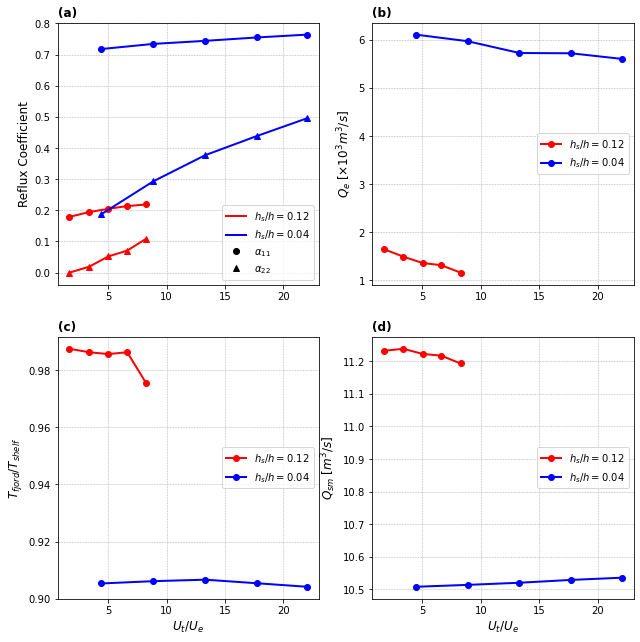

In [3]:
fig6 = plt.figure(figsize=(10,10))
#fig1.tight_layout()
#plt.grid(linestyle='--', linewidth=0.5)    
ax1 = fig6.add_subplot(221)
ax2 = fig6.add_subplot(222)
ax3 = fig6.add_subplot(223)
ax4 = fig6.add_subplot(224)


# Reflux coeff plot
ax1.plot(ur1/2,alp11_1,'^-r', ur1/2,alp22_1,'o-r', ms=6,lw=2)
ax1.plot(ur2/2,alp11_2,'^-b', ur2/2,alp22_2,'o-b', ms=6,lw=2)

line1 = plt.Line2D((0,1),(0,0), color='r', lw=2, linestyle='-')
line2 = plt.Line2D((0,1),(0,0), color='b', lw=2, linestyle='-')
marker1 = plt.Line2D((0,1),(0,0), color='k', marker='o', linestyle='')
marker2 = plt.Line2D((0,1),(0,0), color='k', marker='^', linestyle='') 
ax1.legend([line1,line2,marker1,marker2],[r'$h_s/h=0.12$',r'$h_s/h=0.04$',r'$\alpha_{11}$', r'$\alpha_{22}$'],
              loc='best', fontsize=10)

ax1.grid(linestyle='--', linewidth=0.5)
#ax1.set_xticks([1, 2.5, 10, 25])
#ax1.set_xticklabels(['1','2.5','10','25'], size=12)
ax1.set_ylabel(r'Reflux Coefficient',size = 12)
#ax1.xaxis.set_visible(False)
ax1.set_title(r'(a)', loc='left', size=12, weight='bold')


# Qe plot
ax2.plot(ur1/2,Qe1/1000,'o-r', ur2/2,Qe2/1000,'o-b',ms=6, lw=2)
ax2.legend([r'$h_s/h=0.12$',r'$h_s/h=0.04$'],loc='right', fontsize=10)
#ax2.set_xticks([1, 2.5, 10, 25])
#ax2.set_xticklabels(['1','2.5','10','25'], size=12)
ax2.set_ylabel(r'$Q_e\;[\times 10^3m^3/s]$',size = 12)
ax2.grid(linestyle='--', linewidth=0.5)
ax2.set_title(r'(b)', loc='left', size=12, weight='bold')


# T_fjord/T_shelf plot
ax3.plot(ur1/2,Tsre1,'o-r', ur2/2,Tsre2,'o-b',ms=6, lw=2)
ax3.legend([r'$h_s/h=0.12$',r'$h_s/h=0.04$'],loc='right', fontsize=10)
#ax3.set_xticks([1, 2.5, 10, 25])
#ax3.set_xticklabels(['1','2.5','10','25'], size=12)
ax3.set_xlabel(r'$U_t/U_e$',size = 12)
ax3.set_ylabel(r'$T_{fjord}/T_{shelf}$',size = 12)
ax3.grid(linestyle='--', linewidth=0.5)
ax3.set_title(r'(c)', loc='left', size=12, weight='bold')


# Qsm plot
ax4.plot(ur1/2,Qsm1,'o-r', ur2/2,Qsm2,'o-b',ms=6, lw=2)
ax4.legend([r'$h_s/h=0.12$',r'$h_s/h=0.04$'],loc='right', fontsize=10)
#ax4.set_xticks([1, 2.5, 10, 25])
#ax4.set_xticklabels(['1','2.5','10','25'], size=12)
ax4.set_xlabel(r'$U_t/U_e$',size = 12)
ax4.set_ylabel(r'$Q_{sm}\;[m^3/s]$',size = 12)
ax4.grid(linestyle='--', linewidth=0.5)
ax4.set_title(r'(d)', loc='left', size=12, weight='bold')

# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.2)

In [4]:
fig_path = "/home/1959/Jupyter_Figs/Parameters/"
if not os.path.exists(fig_path):
    os.makedirs(fig_path)

#fig1.savefig(fig_path + '/Qsg_comp.png', dpi=200, bbox_inches='tight')
#fig2.savefig(fig_path + '/T0_comp.png', dpi=200, bbox_inches='tight')
#fig3.savefig(fig_path + '/Cd_comp.png', dpi=200, bbox_inches='tight')
#fig4.savefig(fig_path + '/T0&Sz_comp.png', dpi=200, bbox_inches='tight')
#fig5.savefig(fig_path + '/Cd_comp.png', dpi=200, bbox_inches='tight')
fig6.savefig(fig_path + '/Tide_comp.png', dpi=200, bbox_inches='tight')